# **Import and preprocess the dataset**

In [1]:
!pip install -q opendatasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)

import opendatasets as od

In [5]:
od.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data', data_dir='dataset')

csv_file_path = "/content/dataset/breast-cancer-wisconsin-data/data.csv"
df = pd.read_csv(csv_file_path)

df.head()

Skipping, found downloaded files in "dataset/breast-cancer-wisconsin-data" (use force=True to force download)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"])

In [12]:
# Encode target (M=1, B=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [13]:
# Separate features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# **Train/test split and standardize features**

In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Fit a Logistic Regression model**

In [16]:
# Fit logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
# Predict probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [18]:
# Choose threshold
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

# **Evaluate with confusion matrix, precision, recall, ROC-AUC**

In [22]:
# Metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.975
Recall: 0.9285714285714286
ROC AUC: 0.996031746031746


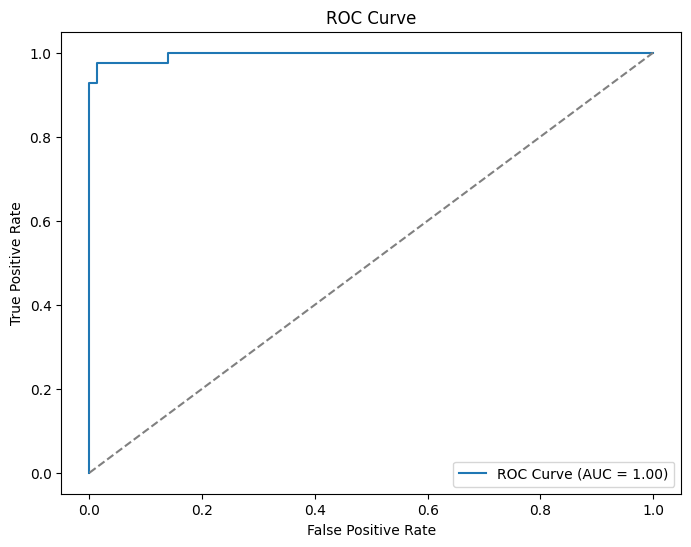

In [20]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Sigmoid function**

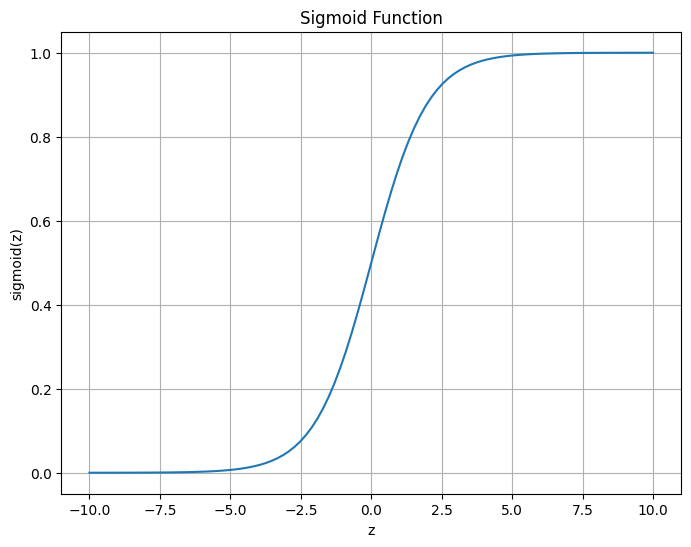

In [21]:
# Sigmoid visualization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigmoid_vals = sigmoid(z)
plt.figure(figsize=(8,6))
plt.plot(z, sigmoid_vals)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()